In [5]:
import networkx as nx
from collections import defaultdict
import urllib.request
import json
import pandas as pd
import re
import pickle
import numpy as np
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
data_path = 'LargeData/'
file = 'links2022.ndjson'

data = pd.read_json(data_path + file, lines=True)
data = data.rename(columns={'out_going':'author','in_going':'adressee'})
author_posts = dict()
for post in tqdm(range(data.shape[0])):
    # Create a dictionary of authors and their flair, who they answered and their comment
    author_name = data['author'][post]
    author_flair = data['flair'][post]
    answered = data['adressee'][post]
    comment = data['comment'][post]
    comment_id = data['id'][post]
    
    # Add author to dictionary or add attributes
    if author_name not in author_posts:
        author_posts[author_name] = [author_flair,[answered],comment,[comment_id]]
    else:
        author_posts[author_name][1].append(answered)
        author_posts[author_name][2] += comment
        author_posts[author_name][3].append(comment_id)

100%|██████████| 1245214/1245214 [00:23<00:00, 52526.28it/s]


In [12]:
# Initialize dictionaries to track flair counts for posts and comments
flair_post_count = defaultdict(int)
flair_comment_count = defaultdict(int)

# Iterate through the author_posts dictionary to count posts and comments per flair
for author, details in author_posts.items():
    flair = details[0]
    comments = details[1]  # Changed index to access the list of answered comments
    
    # Count posts per flair
    flair_post_count[flair] += 1
    
    # Count comments per flair
    flair_comment_count[flair] += len(comments)

# Find the flair that posts the most
max_posts_flair = max(flair_post_count, key=flair_post_count.get)
max_posts_count = flair_post_count[max_posts_flair]

# Find the flair that comments the most
max_comments_flair = max(flair_comment_count, key=flair_comment_count.get)
max_comments_count = flair_comment_count[max_comments_flair]

print(f"Flair that posts the most: {max_posts_flair} with {max_posts_count} posts")
print(f"Flair that comments the most: {max_comments_flair} with {max_comments_count} comments")

Flair that posts the most: intp with 7834 posts
Flair that comments the most: intp with 219957 comments


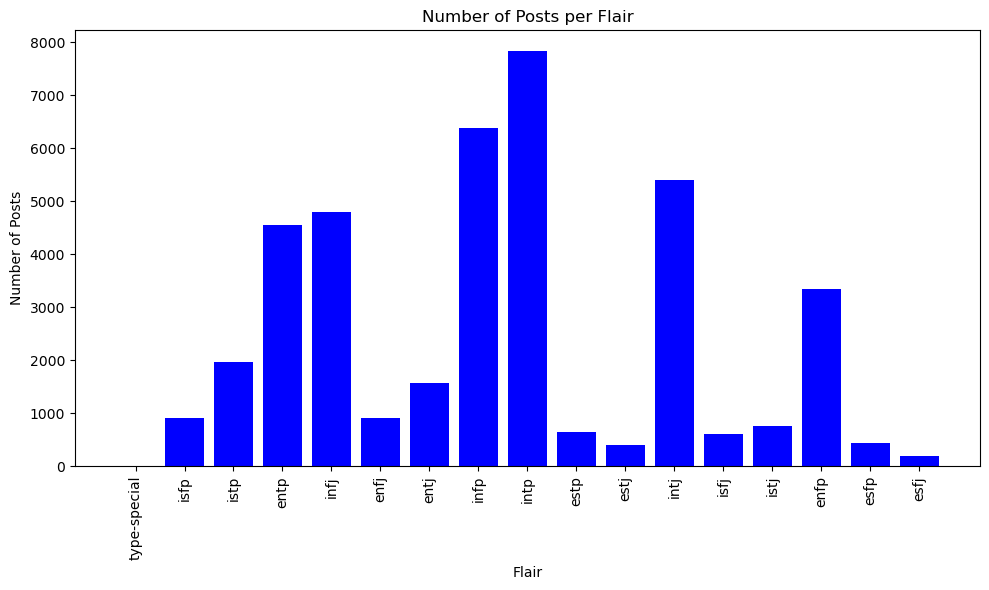

In [15]:
# Histogram for the number of posts per flair
plt.figure(figsize=(10, 6))
plt.bar(flair_post_count.keys(), flair_post_count.values(), color='blue')
plt.xlabel('Flair')
plt.ylabel('Number of Posts')
plt.title('Number of Posts per Flair')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

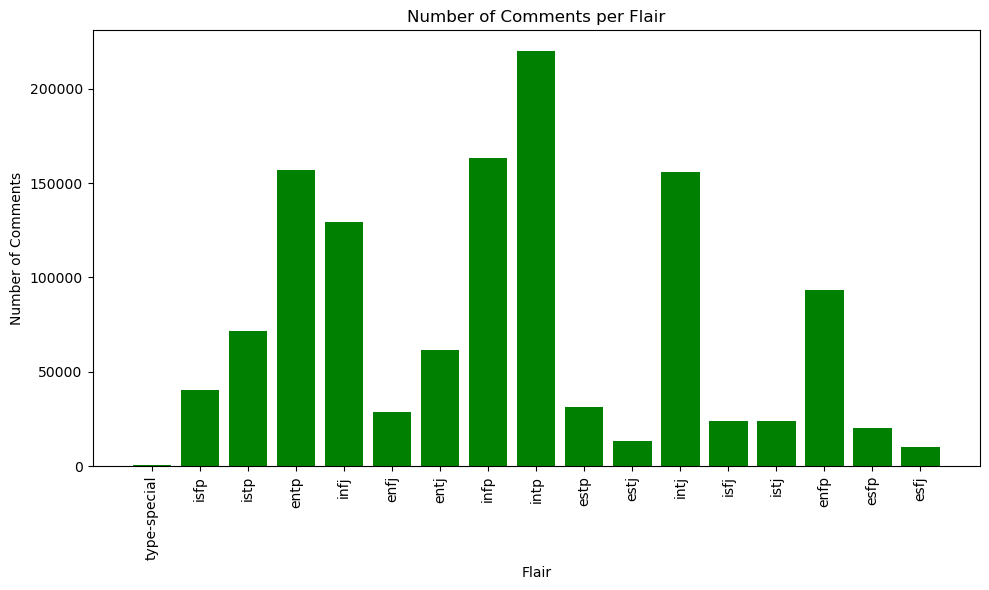

In [16]:
# Histogram for the number of comments per flair
plt.figure(figsize=(10, 6))
plt.bar(flair_comment_count.keys(), flair_comment_count.values(), color='green')
plt.xlabel('Flair')
plt.ylabel('Number of Comments')
plt.title('Number of Comments per Flair')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()